# Unemployment EDA

### Import libraries and set plotting style

In [1]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../scr')
from analysis import *
from data_preprocessing import *
from plot import *
from utils import *
from itertools import product

sns.set_style("darkgrid")


 ### Feature Numbers and Model Types

In [76]:
feature_numbers = ['9', '22','30' ]
model_types = ['LP','RP', 'LB', 'RB' ]

### Load CSV files

In [ ]:
df = load_and_clean_predictions = load_and_clean_predictions('unemployment','predictions', feature_numbers, model_types, data_path='../predictions/')ictions('unemployment','predictions', feature_numbers, model_types, data_path='../predictions/')

Loaded file: unemployment_predictions_9LP_nodate.csv for model 9LP
Loaded file: unemployment_predictions_9RP_nodate.csv for model 9RP
Loaded file: unemployment_predictions_9LB_nodate.csv for model 9LB
Loaded file: unemployment_predictions_9RB_nodate.csv for model 9RB
Loaded file: unemployment_predictions_22LP_nodate.csv for model 22LP
Loaded file: unemployment_predictions_22RP_1128_0647.csv for model 22RP
Loaded file: unemployment_predictions_22LB_1128_1041.csv for model 22LB
Loaded file: unemployment_predictions_22RB_nodate.csv for model 22RB
Loaded file: unemployment_predictions_30LP_nodate.csv for model 30LP
Loaded file: unemployment_predictions_30RP_nodate.csv for model 30RP
Loaded file: unemployment_predictions_30LB_nodate.csv for model 30LB
Loaded file: unemployment_predictions_30RB_1128_0841.csv for model 30RB


### Combine predictions

In [78]:
combined = {}

for model_type in model_types:
    combined[model_type]  = pd.concat([df['9'][model_type],
                                      remove_id_column(df['22'][model_type]),
                                      remove_id_column(df['30'][model_type])], axis=1)
#print(combined['LP'])

### Model Multiplicity

In [79]:
stats = {model_type: {feature_number: {} for feature_number in feature_numbers + ['combined']} for model_type in model_types}

for model_type in model_types:
    for feature_number in feature_numbers:
        stats[model_type][feature_number] = compute_row_stats(df[feature_number][model_type])

for model_type in model_types:
    stats[model_type]['combined'] = compute_row_stats(combined[model_type])

In [80]:
#stats['LP']['combined']

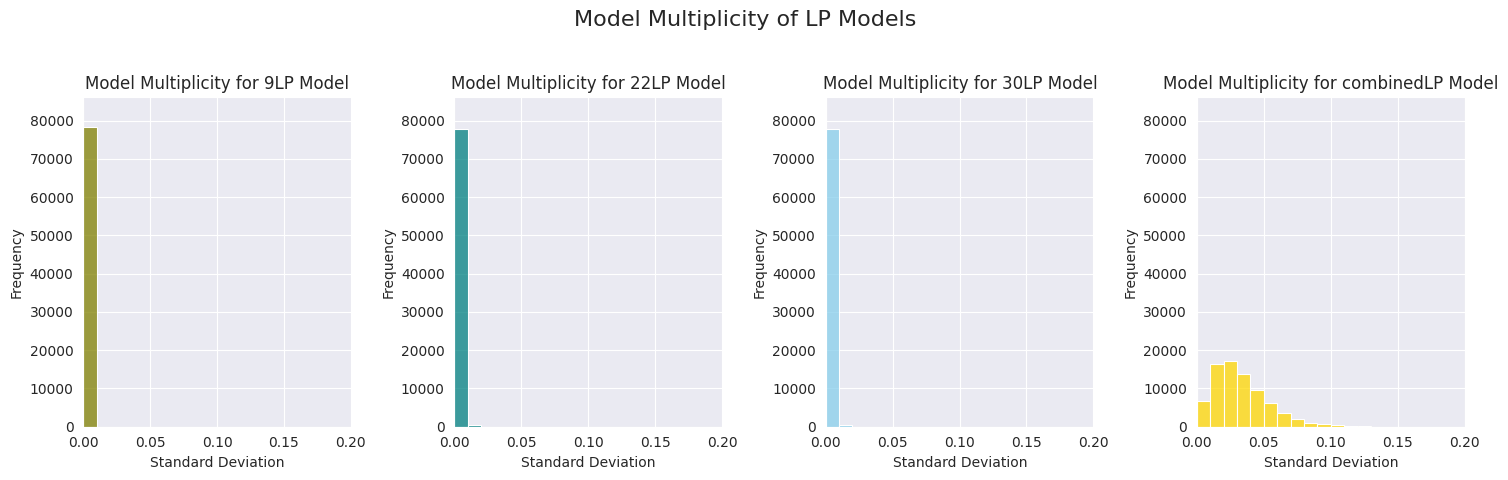

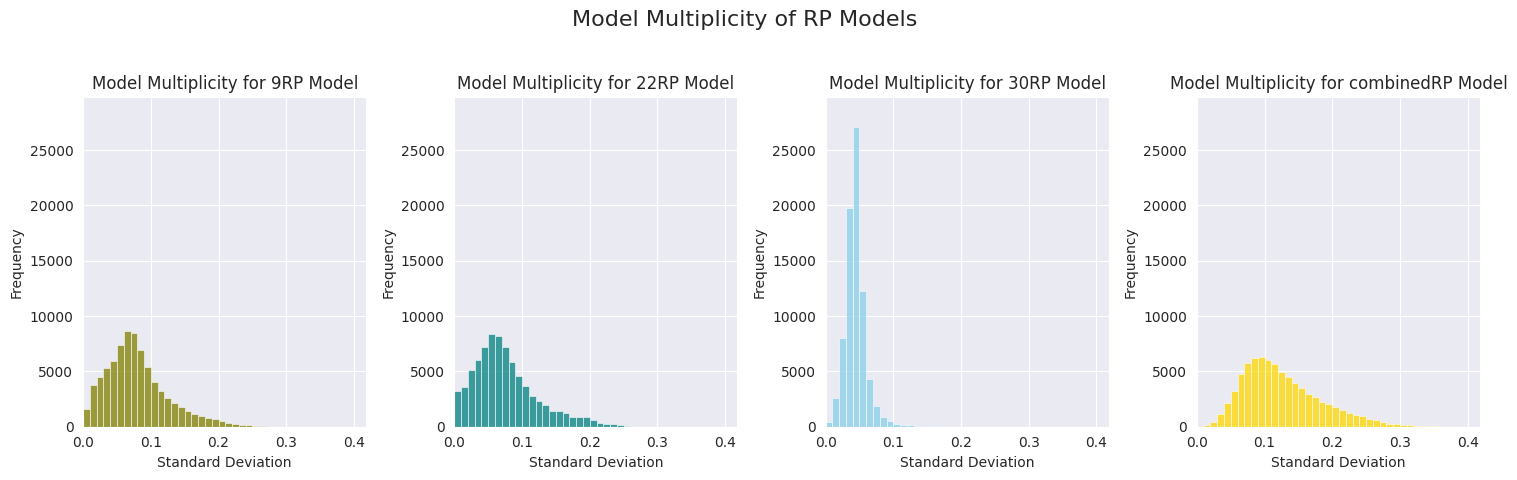

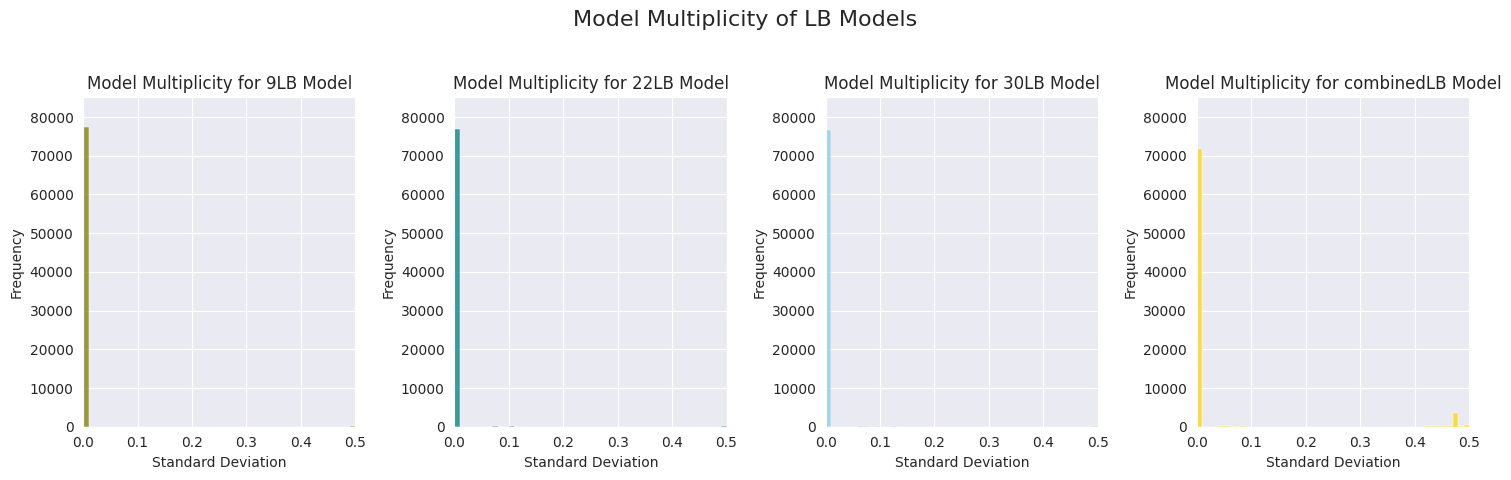

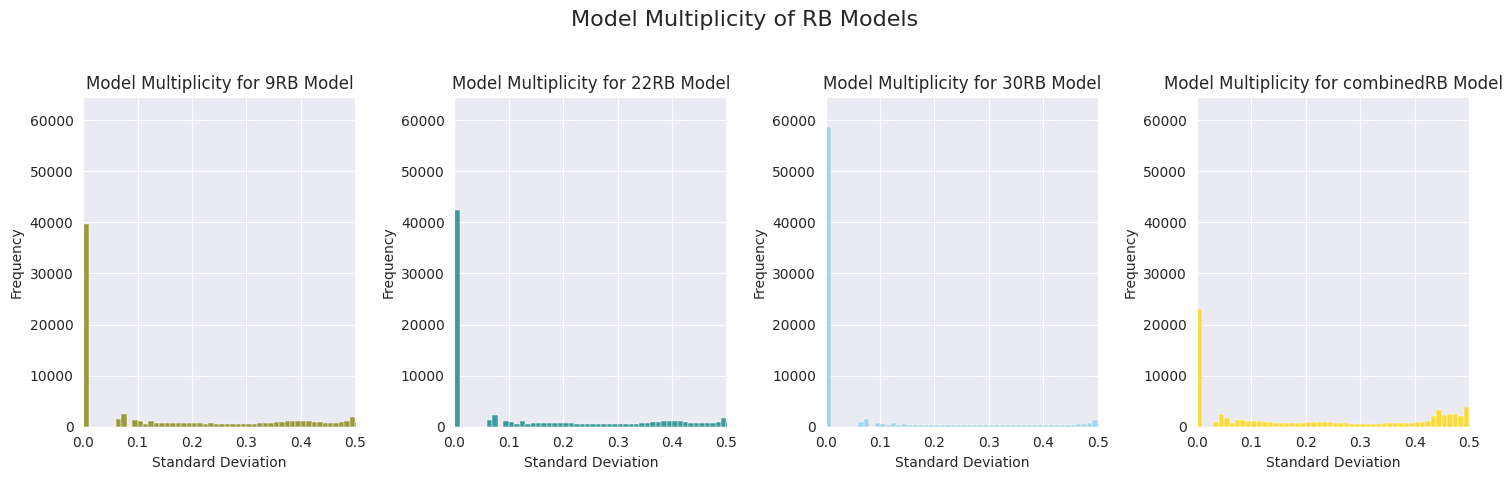

In [81]:
all_std = {}

suffixes = ['9', '22','30', 'combined']

# model multiplicity for each model (i.e. 9LP, 22RP etc.) and for each combined predictions (i.e. combinedLP, combinedRP etc.)
for model_type in model_types:
    std_columns = [stats[model_type][feature_number]['std'] for feature_number in suffixes]
    all_std[model_type] = pd.concat(std_columns, axis=1)
    all_std[model_type].columns = [f'std_{suffix}' for suffix in suffixes]
    plot_all_multiplicity({model_type: all_std[model_type]}, suffixes, colors=['olive', 'teal', 'skyblue', 'gold'])


### Mean Distribution

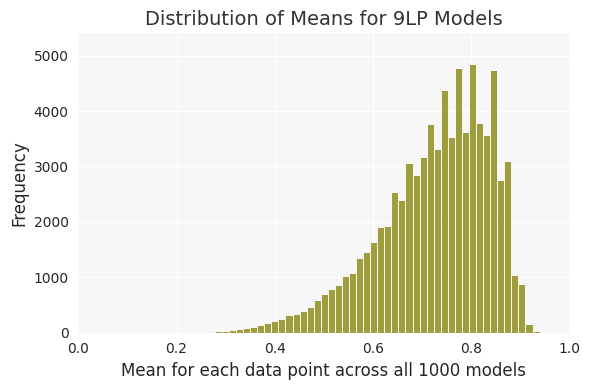

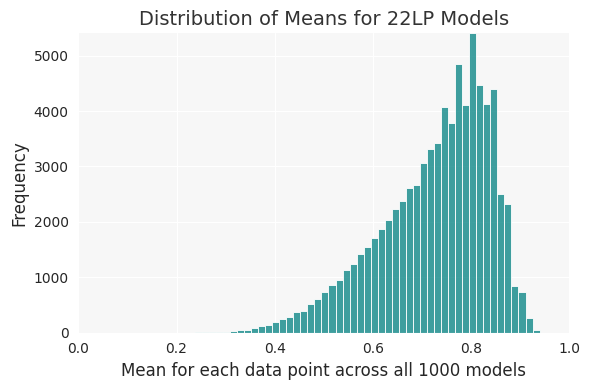

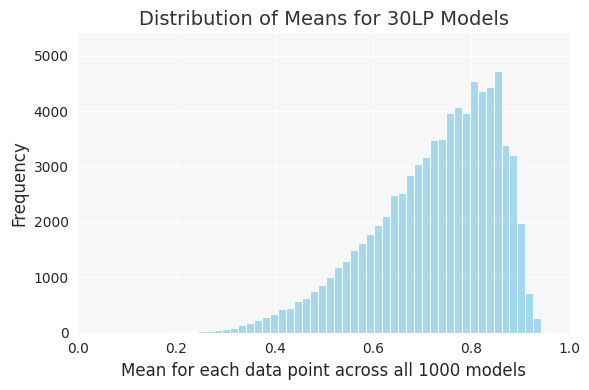

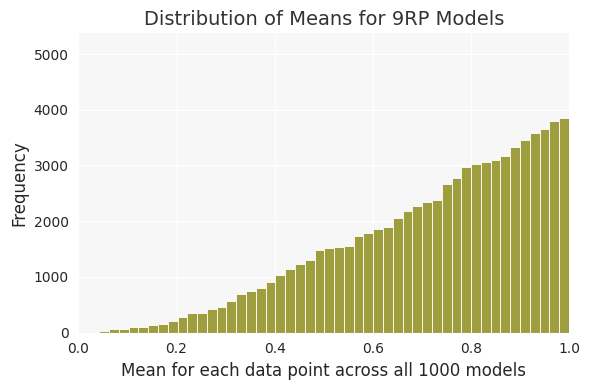

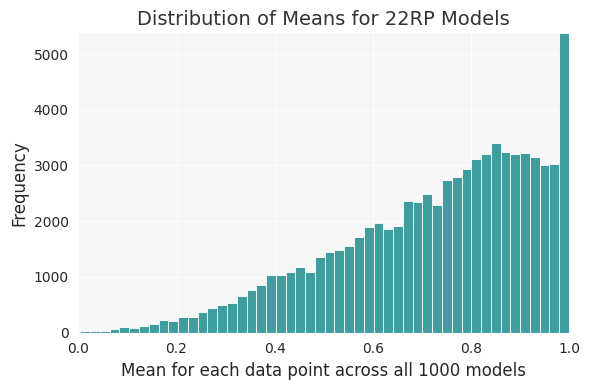

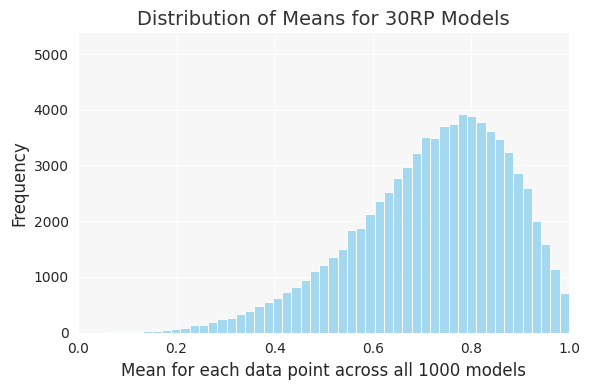

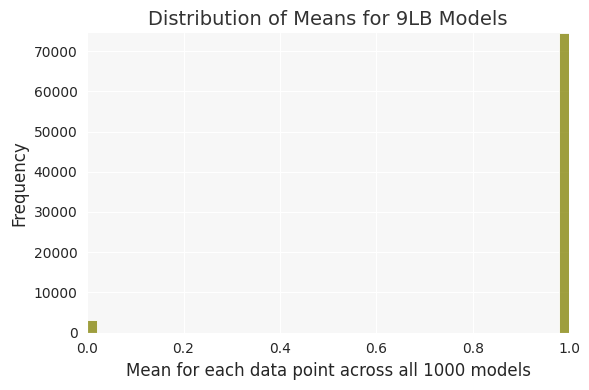

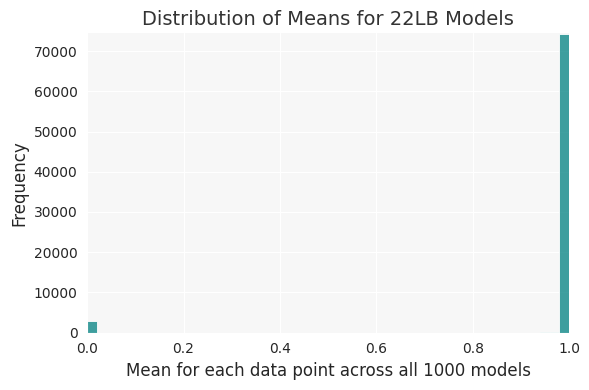

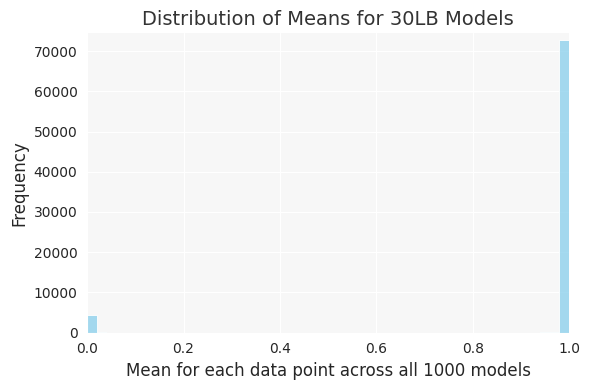

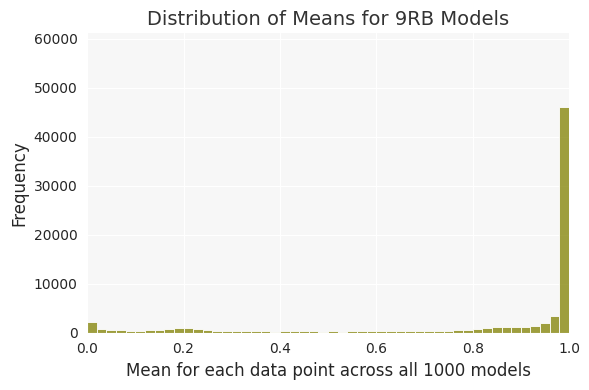

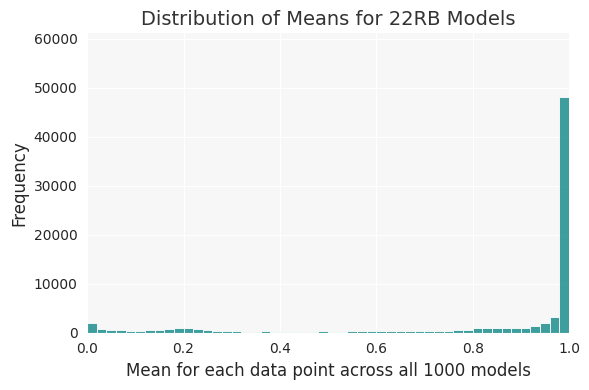

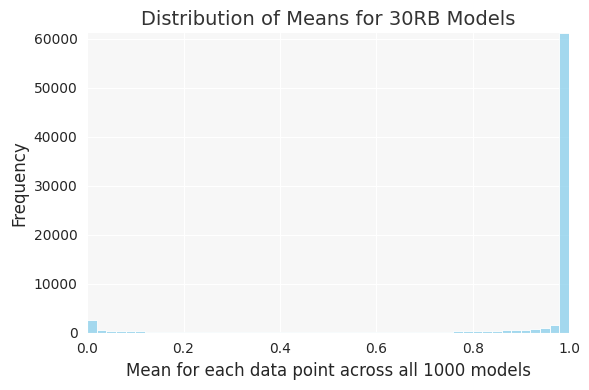

In [82]:
means = {}

# mean distributions
for model_type in model_types:
    mean_columns = [stats[model_type][feature_number]['mean'] for feature_number in feature_numbers]
    means[model_type] = pd.concat(mean_columns, axis=1)
    means[model_type].columns = [f'mean_{suffix}' for suffix in feature_numbers]
    plot_all_mean_distributions(means[model_type], feature_numbers, model_type, colors=['olive', 'teal', 'skyblue'])

#print(combined_mean['LP'])

In [83]:
print(means['LP'])

         mean_9   mean_22   mean_30
0      0.525143  0.673476  0.494429
1      0.759319  0.825707  0.829686
2      0.680657  0.560188  0.489484
3      0.372683  0.408537  0.334049
4      0.716986  0.616842  0.586459
...         ...       ...       ...
78289  0.533301  0.464126  0.515146
78290  0.459369  0.405534  0.496602
78291  0.502908  0.333724  0.423929
78292  0.327830  0.359717  0.418585
78293  0.736294  0.647824  0.717235

[78294 rows x 3 columns]


### Distribution of Mean Differences

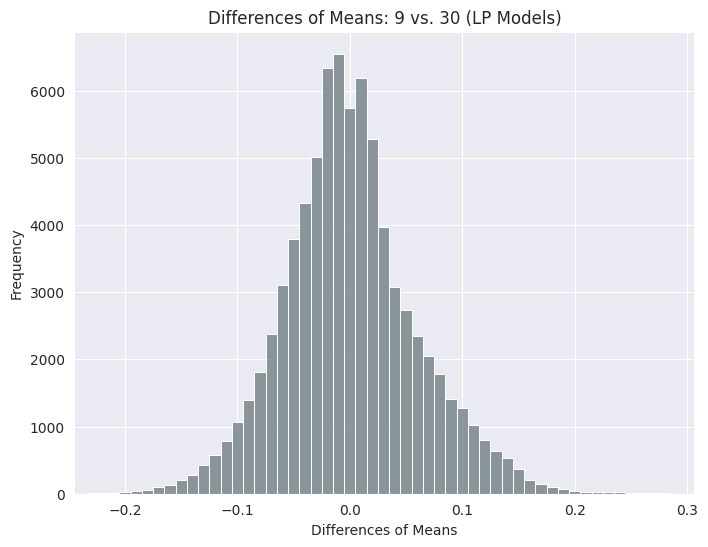

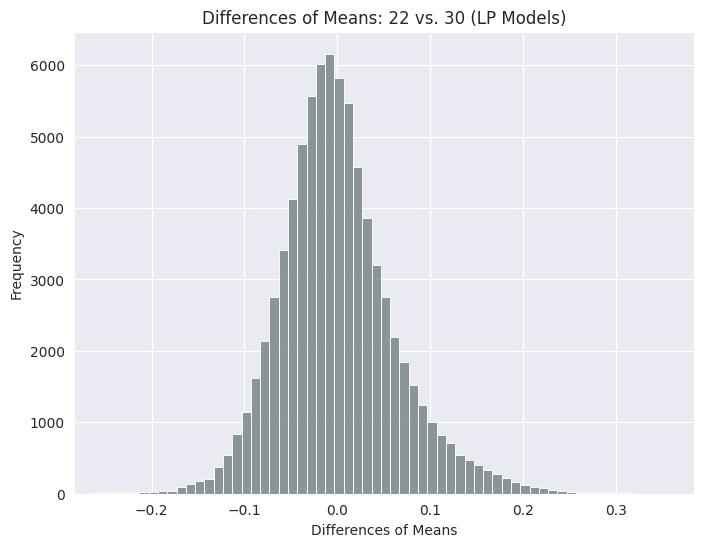

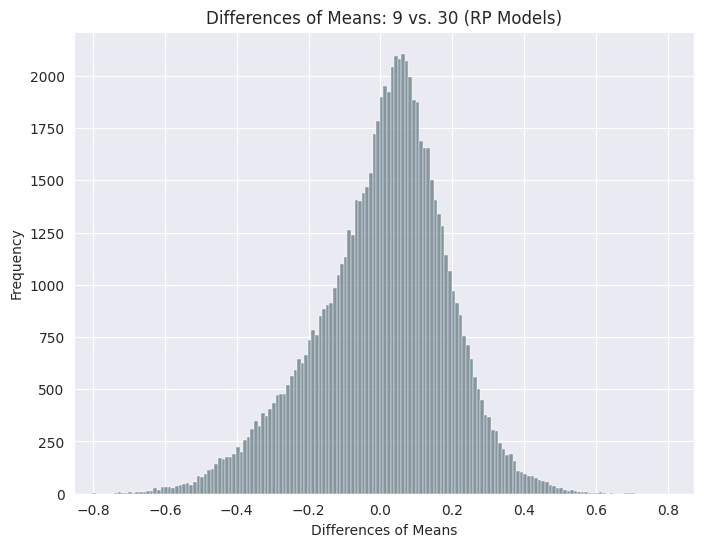

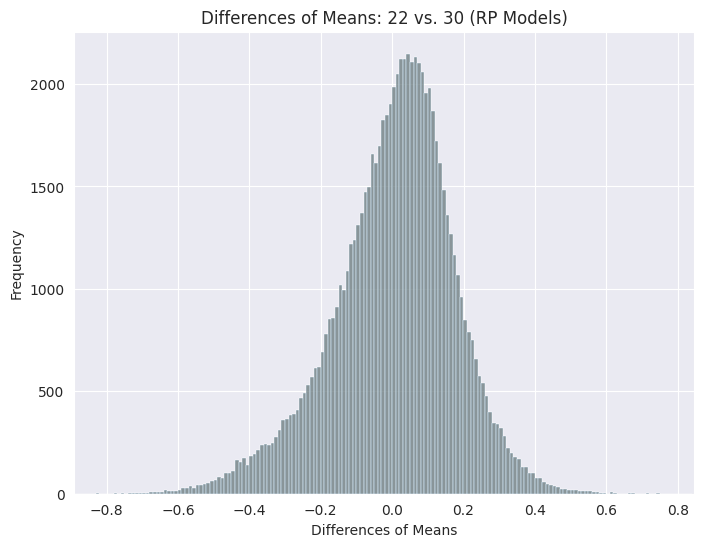

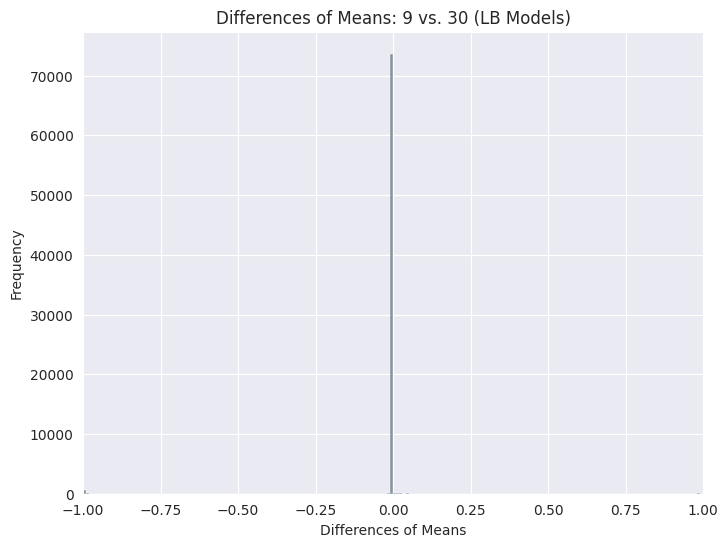

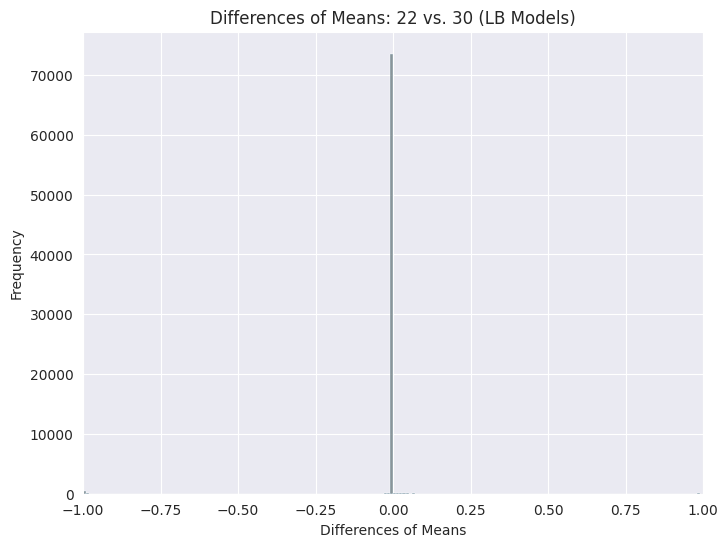

In [88]:
mean_diff = {model_type: {} for model_type in model_types}

# mean differences
for model_type in model_types:
    mean_diff[model_type]['diff_9vs30'] = compute_mean_differences(
        means[model_type], 'mean_9', 'mean_30', feature_1='9', feature_2='30'
    )
    mean_diff[model_type]['diff_22vs30'] = compute_mean_differences(
        means[model_type], 'mean_22', 'mean_30', feature_1='22', feature_2='30'
    )

combined_mean_diff = {
    model_type: pd.concat(
        [mean_diff[model_type]['diff_9vs30'],
         mean_diff[model_type]['diff_22vs30']],
        axis=1
    )
    for model_type in model_types
}

plot_all_differences_histograms(
    mean_diffs=combined_mean_diff,
    model_types=model_types,
    differences=['diff_9vs30', 'diff_22vs30'],
    plot_description_comp=['9 vs. 30', '22 vs. 30', '9 vs. 20'],
    colors=['olive', 'teal', 'skyblue']
)


### Absolute Differences of Means

In [89]:
abs_mean_diff = {model_type: {} for model_type in model_types}

# mean differences
for model_type in model_types:
        abs_mean_diff[model_type]['abs_diff_9vs30'] = absolute_mean_differences(means[model_type], 'mean_9', 'mean_30', feature_1='9', feature_2='30')
        abs_mean_diff[model_type]['abs_diff_22vs30'] = absolute_mean_differences(means[model_type], 'mean_22', 'mean_30', feature_1='22', feature_2='30')

combined_abs_mean_diff = {
    model_type: pd.concat([
        abs_mean_diff[model_type]['abs_diff_9vs30'][['abs_diff_9vs30']],
        abs_mean_diff[model_type]['abs_diff_22vs30'][['abs_diff_22vs30']]
    ], axis=1)
    for model_type in model_types
}

# print(combined_abs_mean_diff['LP'])
# print(combined_abs_mean_diff['RP'])
# print(combined_abs_mean_diff['RP'])

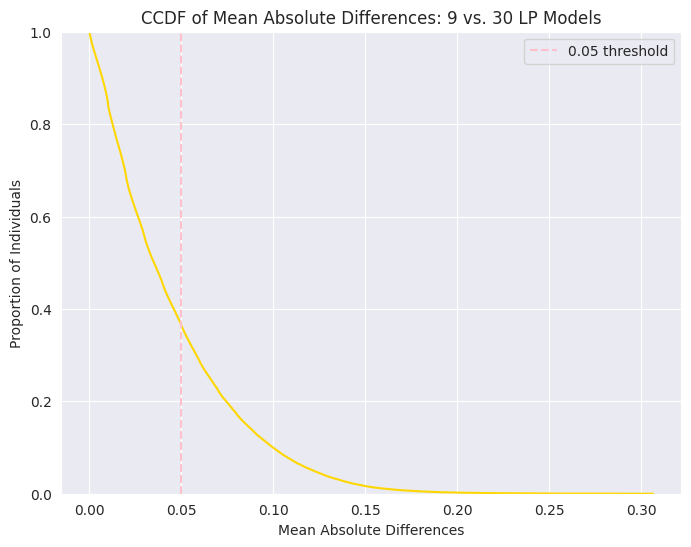

Percentage of points with at least 0.05 absolute difference in means: 36.36%



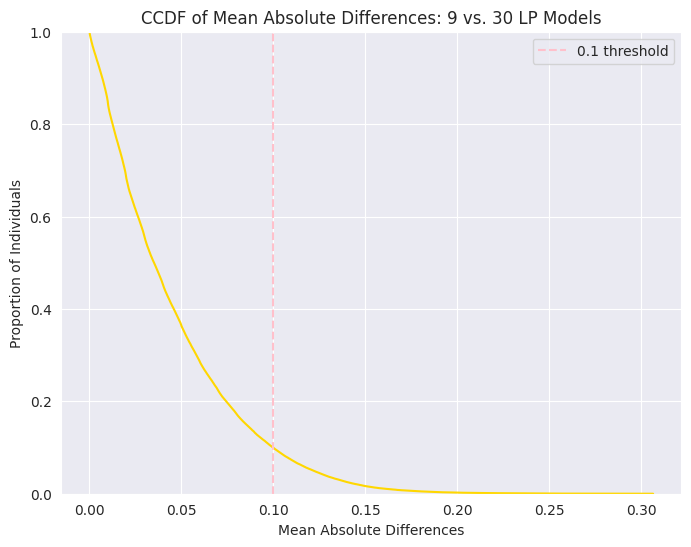

Percentage of points with at least 0.1 absolute difference in means: 9.94%



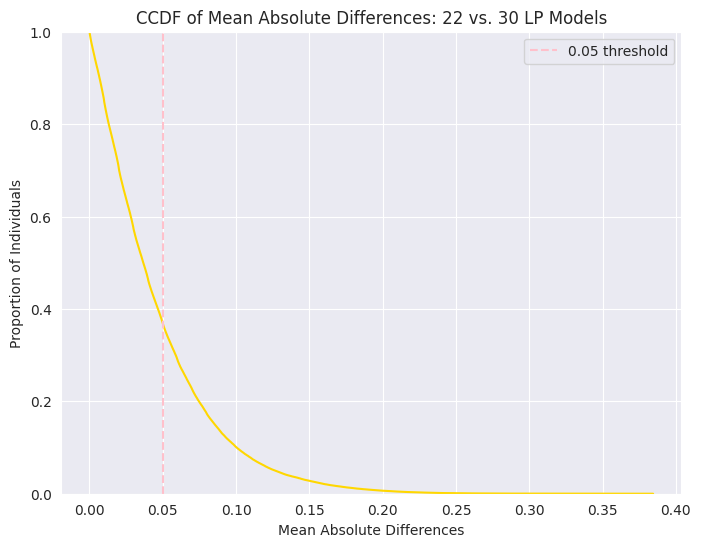

Percentage of points with at least 0.05 absolute difference in means: 36.90%



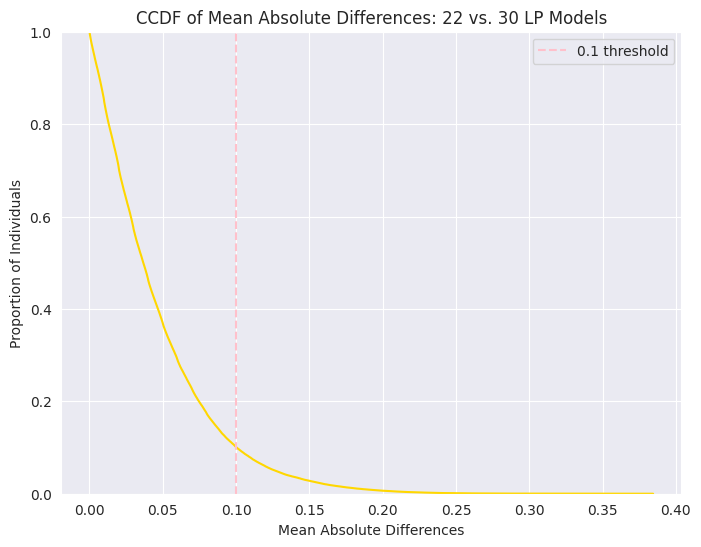

Percentage of points with at least 0.1 absolute difference in means: 10.10%



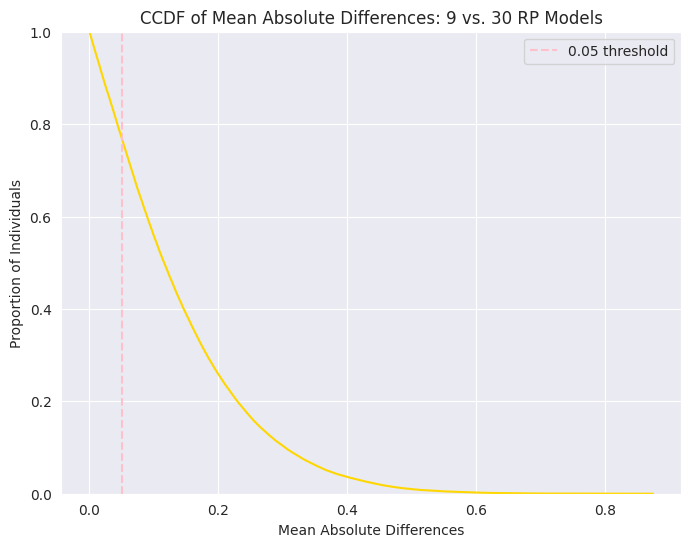

Percentage of points with at least 0.05 absolute difference in means: 77.04%



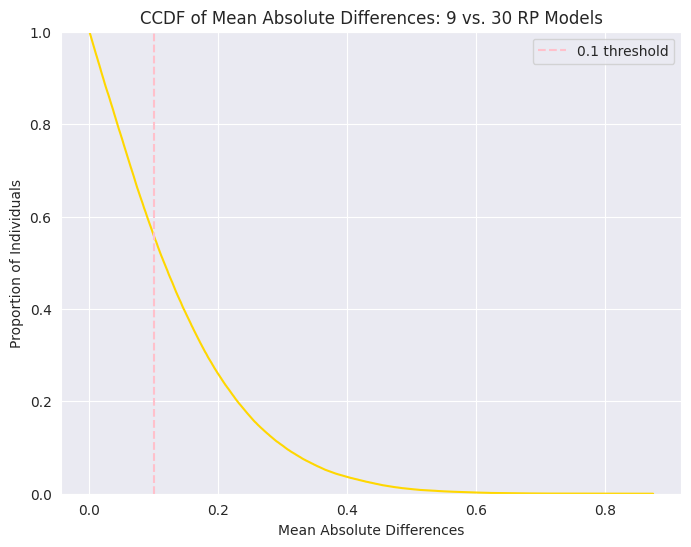

Percentage of points with at least 0.1 absolute difference in means: 55.78%



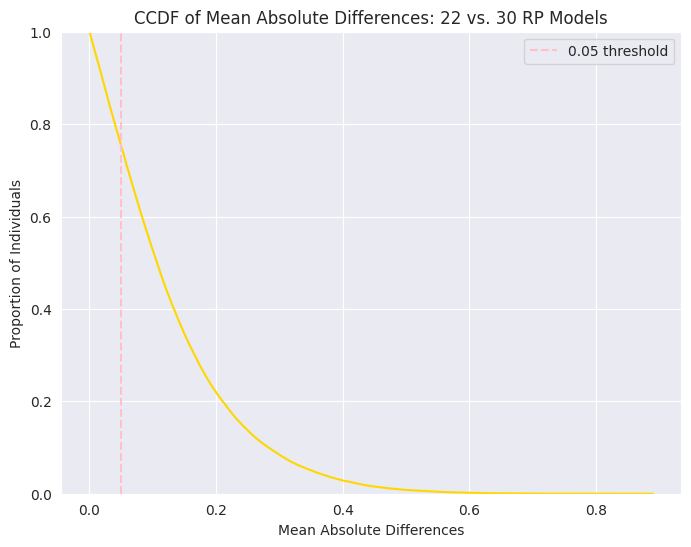

Percentage of points with at least 0.05 absolute difference in means: 75.34%



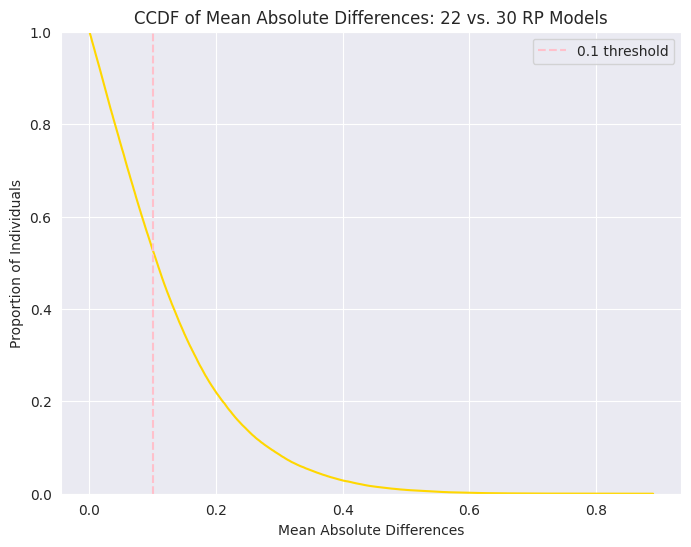

Percentage of points with at least 0.1 absolute difference in means: 52.75%



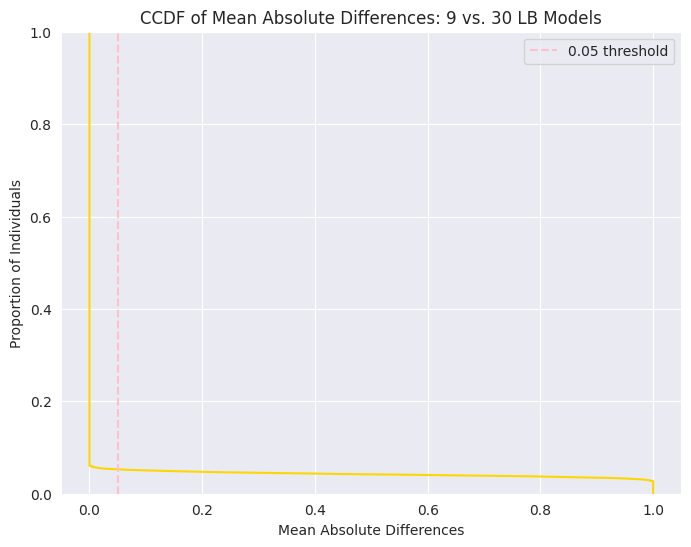

Percentage of points with at least 0.05 absolute difference in means: 5.28%



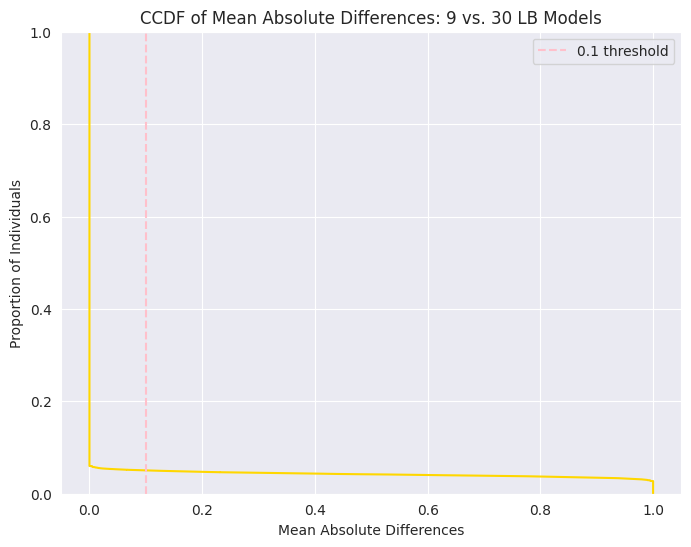

Percentage of points with at least 0.1 absolute difference in means: 5.05%



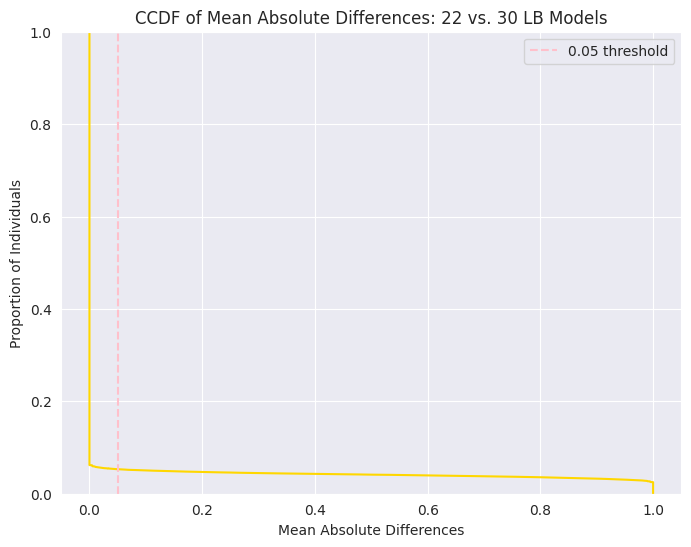

Percentage of points with at least 0.05 absolute difference in means: 5.31%



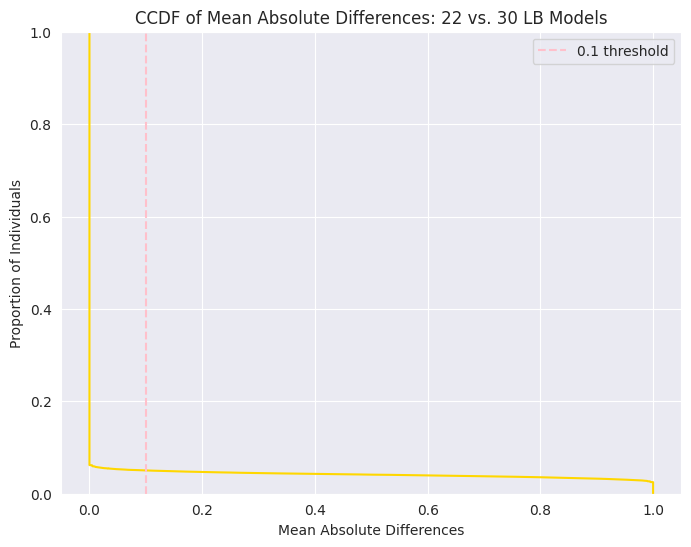

Percentage of points with at least 0.1 absolute difference in means: 5.05%



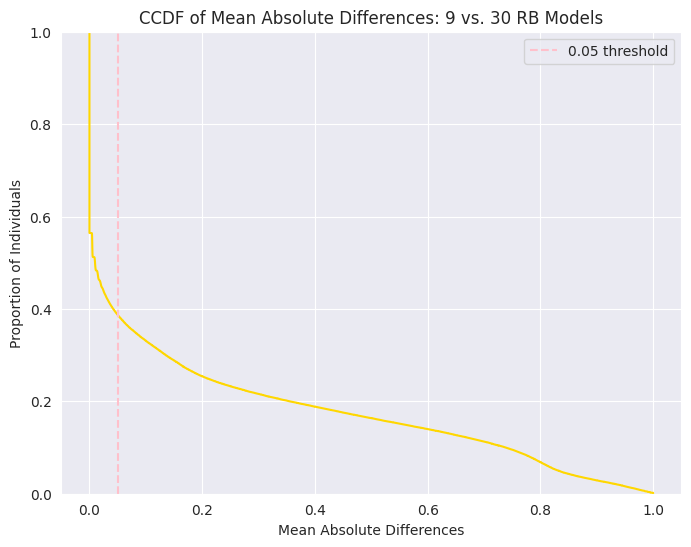

Percentage of points with at least 0.05 absolute difference in means: 38.74%



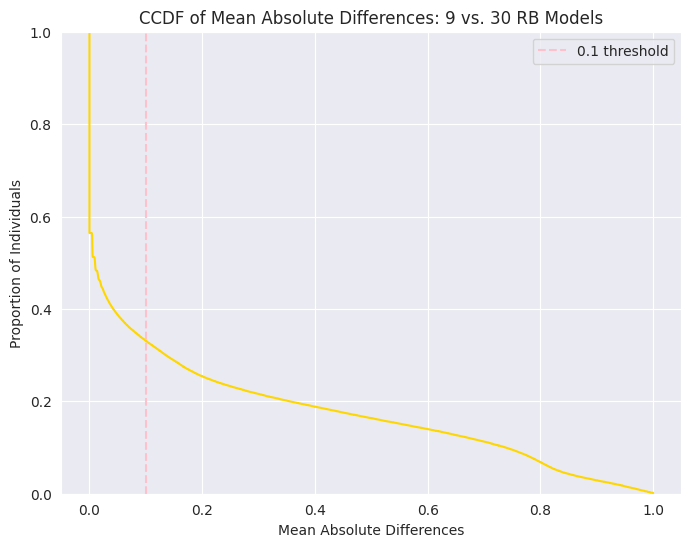

Percentage of points with at least 0.1 absolute difference in means: 33.10%



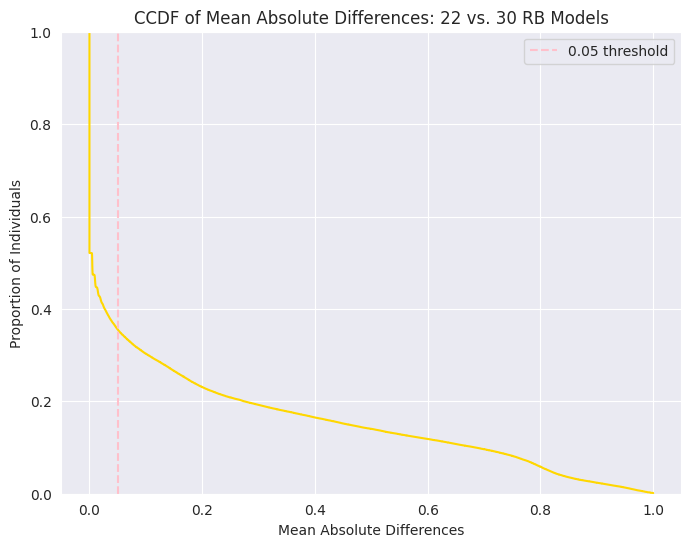

Percentage of points with at least 0.05 absolute difference in means: 35.58%



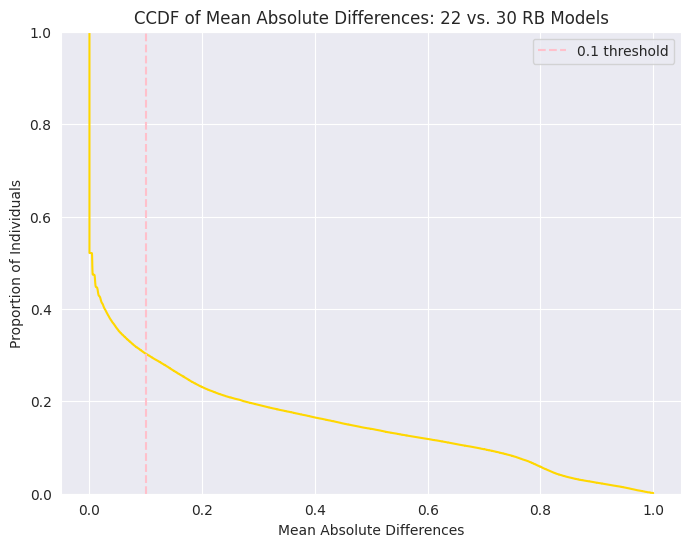

Percentage of points with at least 0.1 absolute difference in means: 30.30%



In [90]:
feature_pairs = [('abs_diff_9vs30', '9 vs. 30'), ('abs_diff_22vs30', '22 vs. 30')]
thresholds = [0.05, 0.1]
diff_type = "mean_of_abs_diff"
color = 'gold'

for model_type in model_types:
    combinations = product(feature_pairs, thresholds)

    for feature_pair, threshold in combinations:
        feature, label = feature_pair

        plot_ccdf(
            data=combined_abs_mean_diff[model_type],
            column=feature,
            diff_type=diff_type,
            color=color,
            threshold=threshold,
            feature_pair=label,
            model_type=model_type
        )

### Mean of Absolute Differences

In [92]:
mean_of_abs_diff = {model_type: {} for model_type in model_types}

# mean of absolute differences
for model_type in model_types:
    mean_of_abs_diff[model_type]['abs_diff_9vs30'] = compute_row_stats(
        compute_absolute_difference(df['9']['LP'], df['30']['LP'], substring_1='9LM', substring_2='30LM')
    )['mean']
    mean_of_abs_diff[model_type]['abs_diff_22vs30'] = compute_row_stats(
        compute_absolute_difference(df['22']['LP'], df['30']['LP'], substring_1='22LM', substring_2='30LM')
    )['mean']

combined_mean_of_abs_diff = {
    model_type: pd.concat([
        mean_of_abs_diff[model_type]['abs_diff_9vs30'].rename("abs_diff_9vs30"),
        mean_of_abs_diff[model_type]['abs_diff_22vs30'].rename("abs_diff_22vs30")
    ], axis=1)
    for model_type in model_types
}

# print(combined_mean_of_abs_diff['LP'])


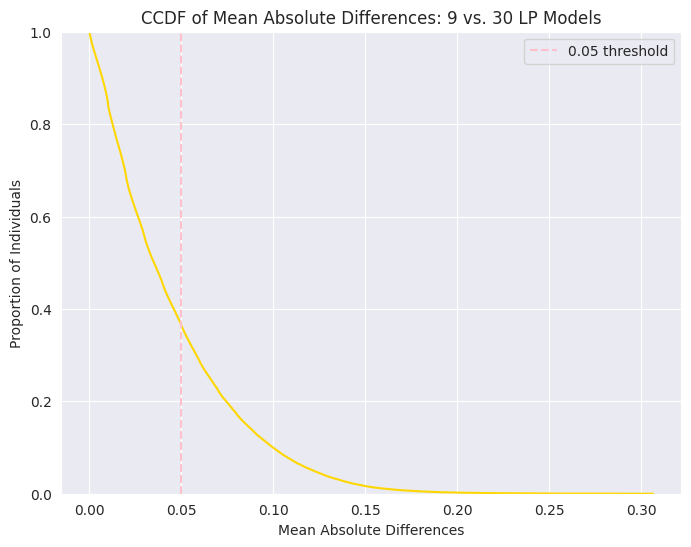

Percentage of points with at least 0.05 absolute difference in means: 36.36%



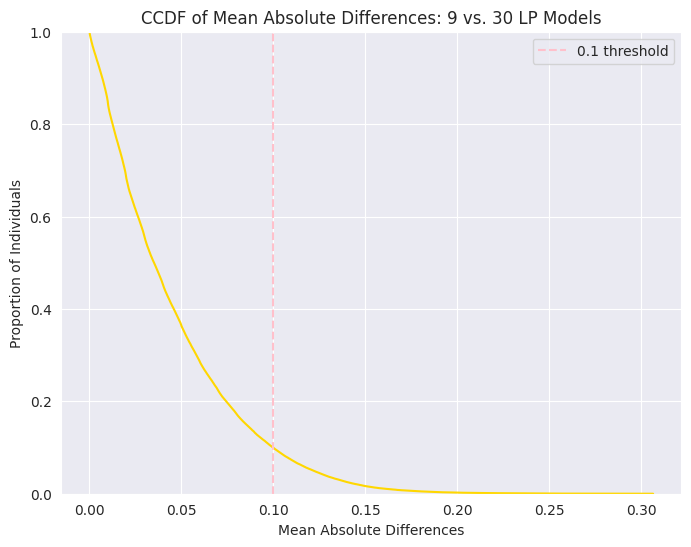

Percentage of points with at least 0.1 absolute difference in means: 9.94%



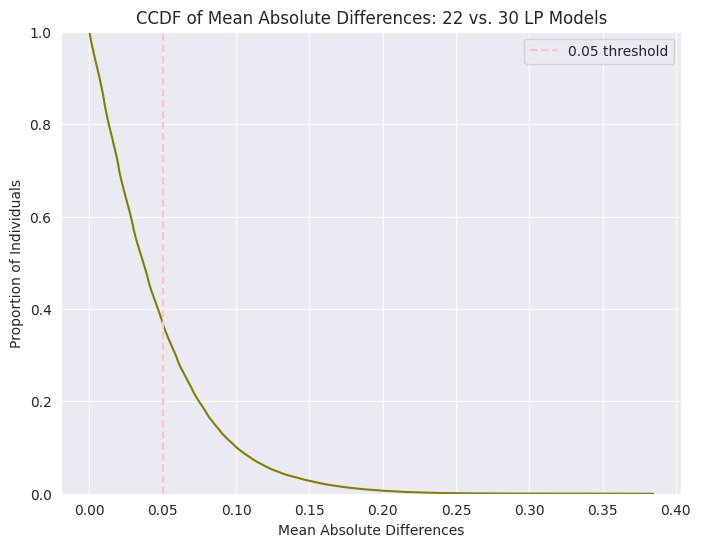

Percentage of points with at least 0.05 absolute difference in means: 36.90%



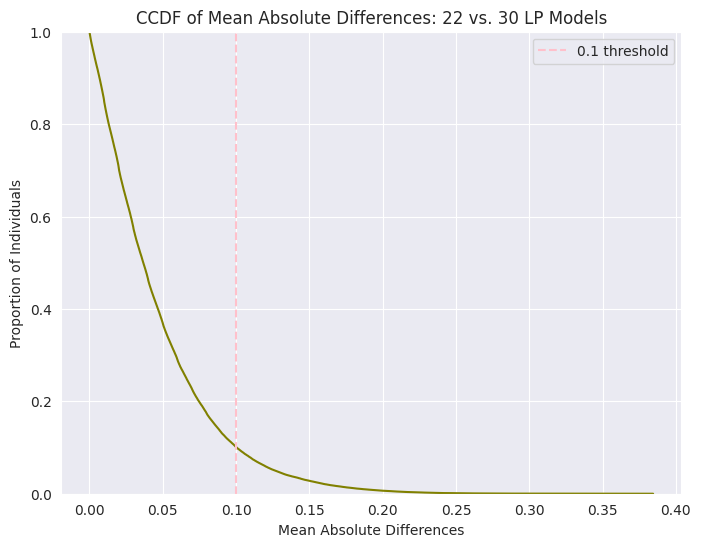

Percentage of points with at least 0.1 absolute difference in means: 10.10%



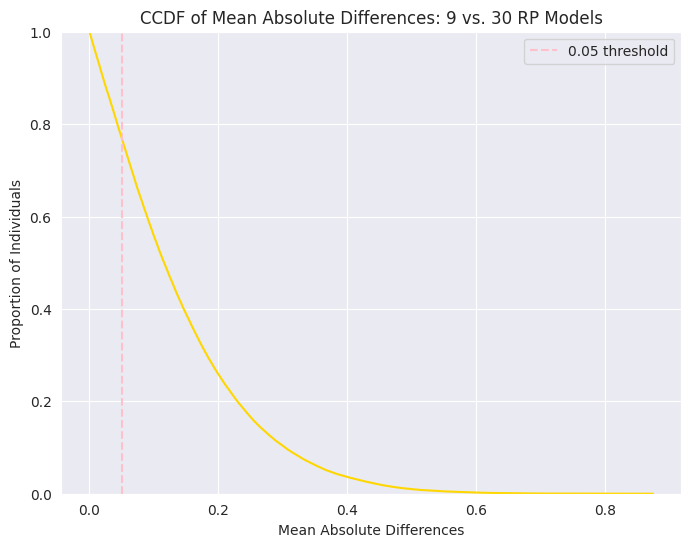

Percentage of points with at least 0.05 absolute difference in means: 77.04%



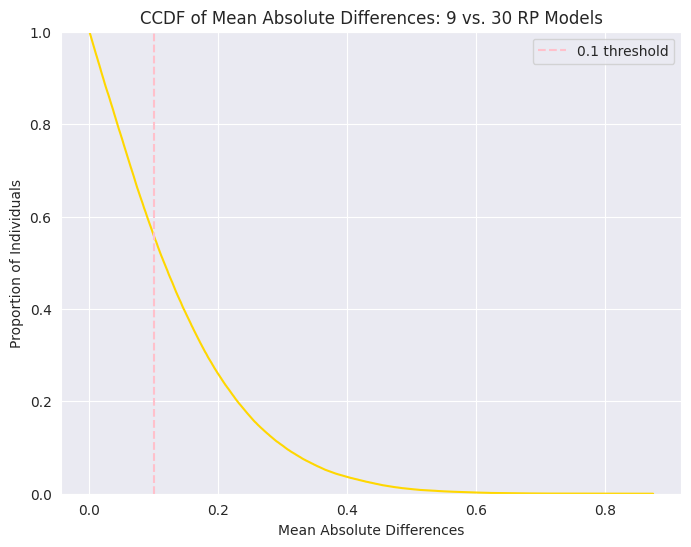

Percentage of points with at least 0.1 absolute difference in means: 55.78%



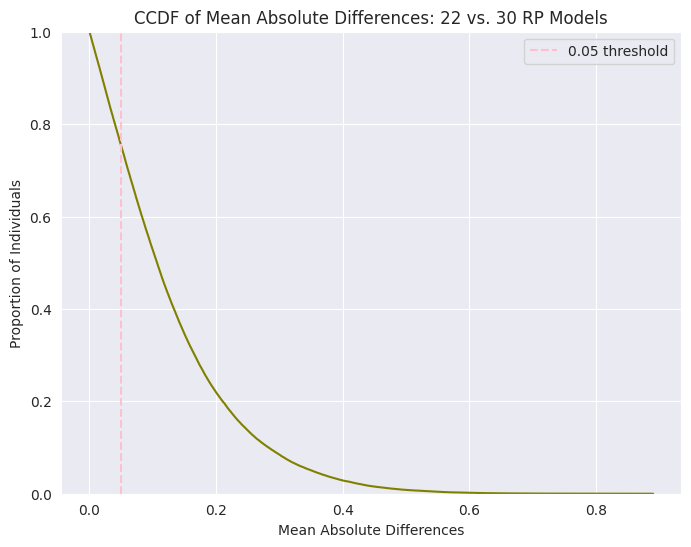

Percentage of points with at least 0.05 absolute difference in means: 75.34%



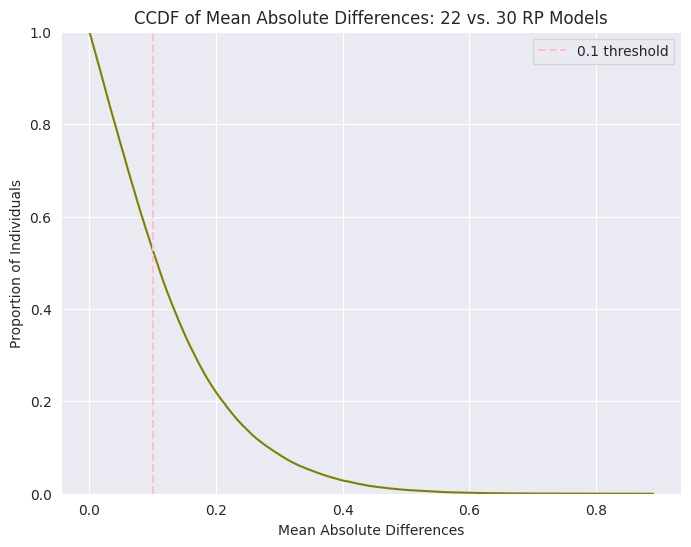

Percentage of points with at least 0.1 absolute difference in means: 52.75%



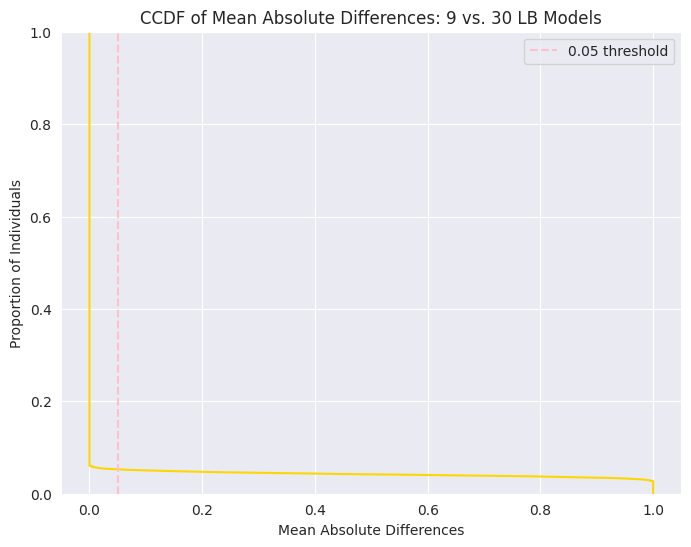

Percentage of points with at least 0.05 absolute difference in means: 5.28%



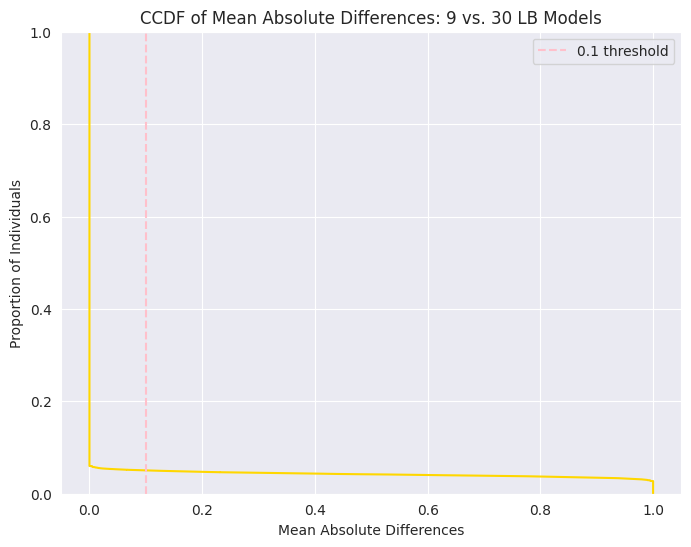

Percentage of points with at least 0.1 absolute difference in means: 5.05%



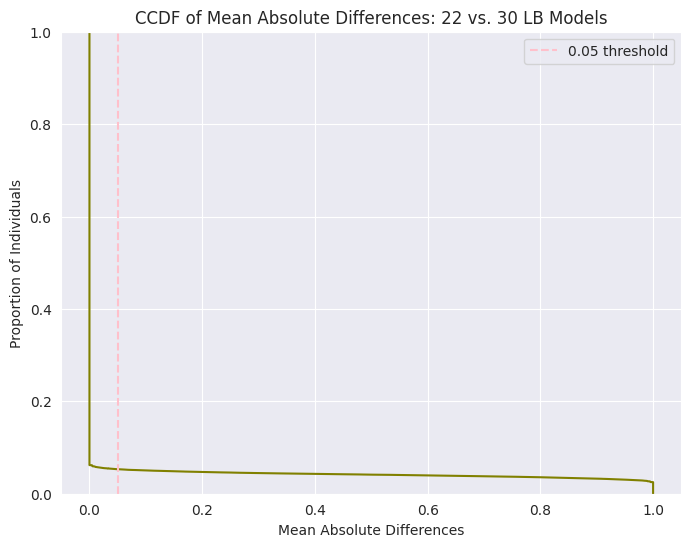

Percentage of points with at least 0.05 absolute difference in means: 5.31%



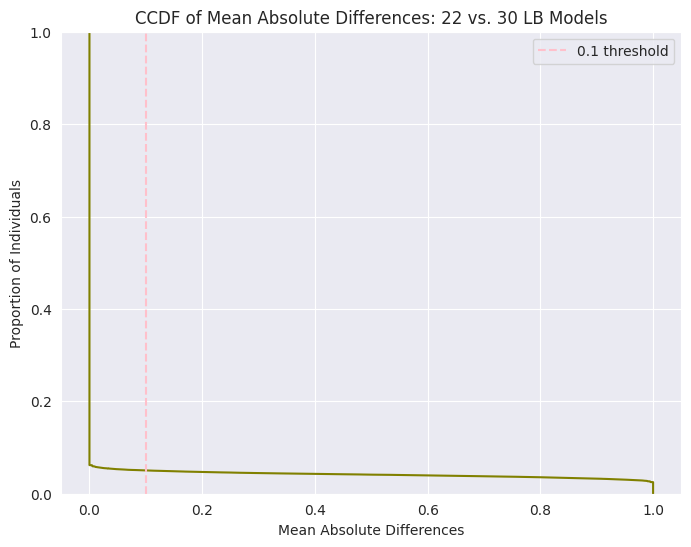

Percentage of points with at least 0.1 absolute difference in means: 5.05%



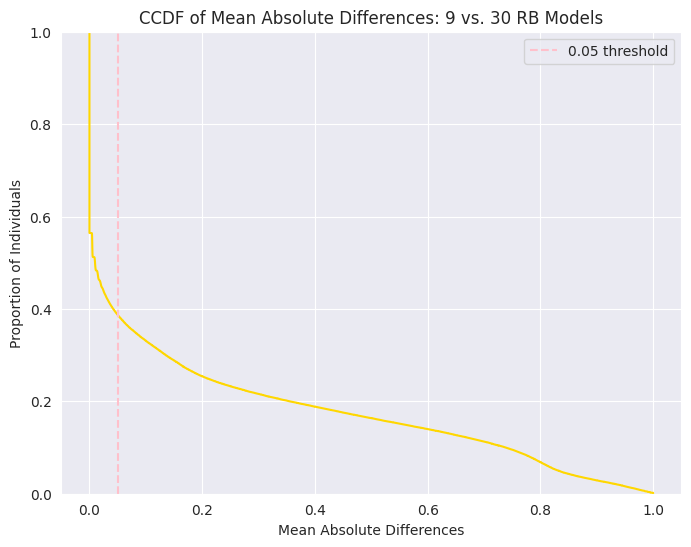

Percentage of points with at least 0.05 absolute difference in means: 38.74%



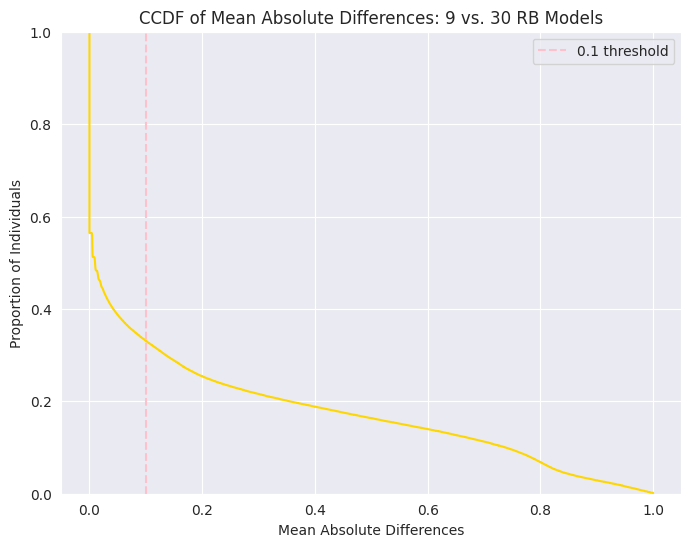

Percentage of points with at least 0.1 absolute difference in means: 33.10%



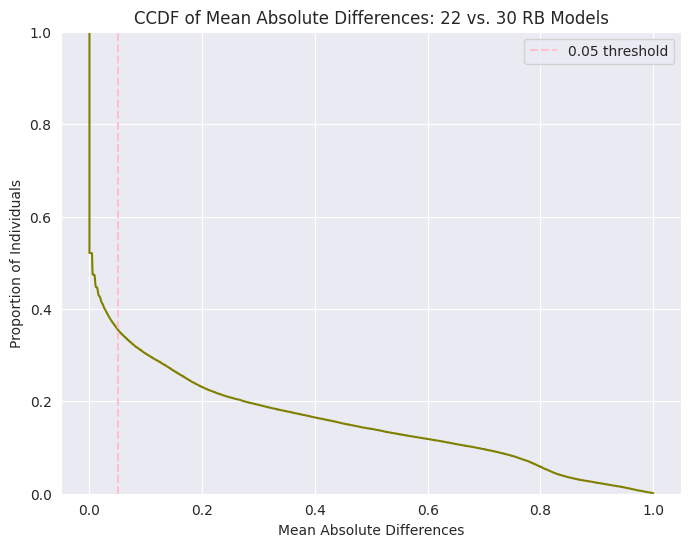

Percentage of points with at least 0.05 absolute difference in means: 35.58%



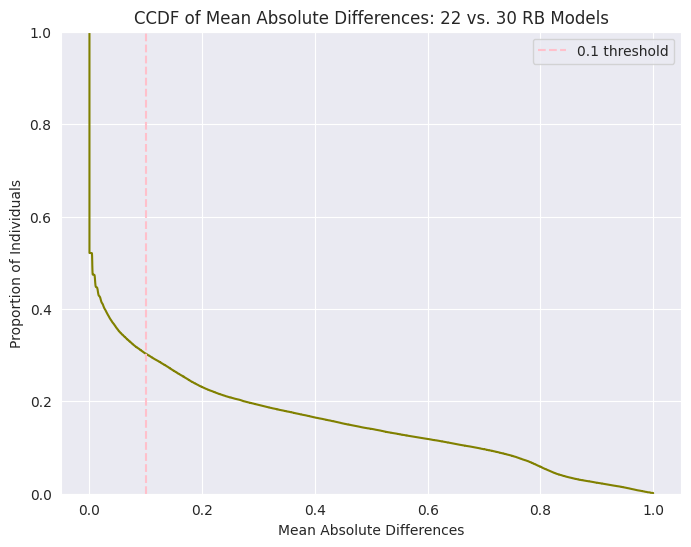

Percentage of points with at least 0.1 absolute difference in means: 30.30%



In [93]:
feature_pairs = [('abs_diff_9vs30', '9 vs. 30'), ('abs_diff_22vs30', '22 vs. 30')]
thresholds = [0.05, 0.1]
diff_type = "mean_of_abs_diff"

for model_type in model_types:
    combinations = product(feature_pairs, thresholds)

    for feature_pair, threshold in combinations:
        feature, label = feature_pair

        if label == '9 vs. 30':
            color = 'gold'
        elif label == '22 vs. 30':
            color = 'olive'
        else:
            color = 'teal'

        plot_ccdf(
            data=combined_abs_mean_diff[model_type],
            column=feature,
            diff_type=diff_type,
            color=color,
            threshold=threshold,
            feature_pair=label,
            model_type=model_type
        )
